Depth = 1
  Training accuracy = 0.6667
  Test accuracy     = 0.6667


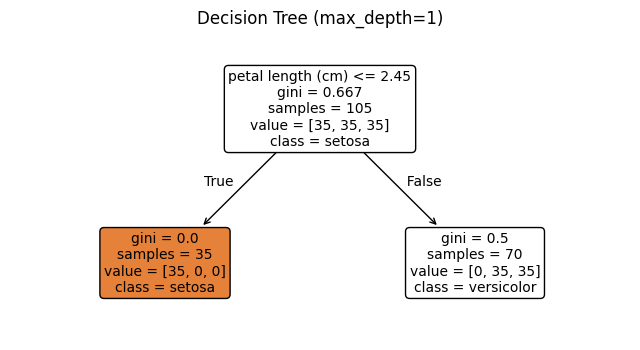

Depth = 2
  Training accuracy = 0.9714
  Test accuracy     = 0.8889


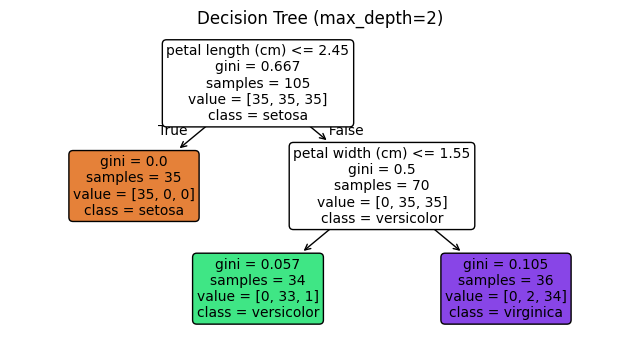

Depth = 3
  Training accuracy = 0.9810
  Test accuracy     = 0.9778


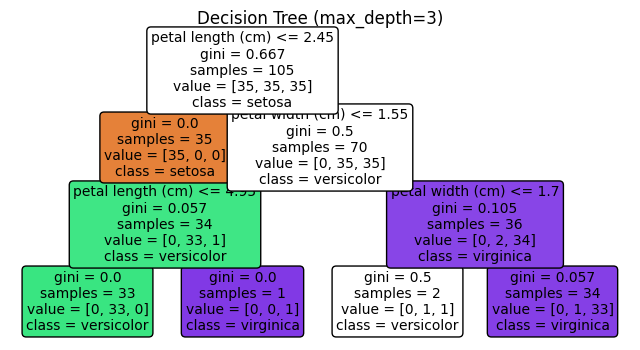


Summary:
Depth | Train Acc | Test Acc
1     | 0.6667     | 0.6667
2     | 0.9714     | 0.8889
3     | 0.9810     | 0.9778

Discussion / Interpretation:
• A very shallow tree (depth = 1) may underfit: it’s too simple to capture class distinctions, so both training and test accuracy are low.
• As depth increases, the model can capture more complexity, so training accuracy tends to increase.
• But after a certain point, deeper trees may overfit: training accuracy gets very high, but test accuracy might stagnate or even drop (because of fitting noise).
• The sweet-spot is where test accuracy is high and not too far from train accuracy, without excessive complexity.


In [2]:
# Decision Tree Classification on Iris — Colab / Notebook version

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load Iris dataset
iris = load_iris()
X = iris.data  # use all features (or you could choose a subset)
y = iris.target

# 2. Split into train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train trees with max_depth = 1, 2, 3
depths = [1, 2, 3]
results = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    results.append((d, train_acc, test_acc))
    print(f"Depth = {d}")
    print(f"  Training accuracy = {train_acc:.4f}")
    print(f"  Test accuracy     = {test_acc:.4f}")
    # Optionally plot the tree
    plt.figure(figsize=(8, 4))
    plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names,
              filled=True, rounded=True, fontsize=10)
    plt.title(f"Decision Tree (max_depth={d})")
    plt.show()

# 4. Tabulate results
print("\nSummary:")
print("Depth | Train Acc | Test Acc")
for d, ta, te in results:
    print(f"{d:<5} | {ta:.4f}     | {te:.4f}")

# 5. Discussion on underfitting vs overfitting
print("\nDiscussion / Interpretation:")
print("• A very shallow tree (depth = 1) may underfit: it’s too simple to capture class distinctions, so both training and test accuracy are low.")
print("• As depth increases, the model can capture more complexity, so training accuracy tends to increase.")
print("• But after a certain point, deeper trees may overfit: training accuracy gets very high, but test accuracy might stagnate or even drop (because of fitting noise).")
print("• The sweet-spot is where test accuracy is high and not too far from train accuracy, without excessive complexity.")

